In [4]:
import pandas as pd

df=pd.read_csv("../data/raw/telco_churn_with_all_feedback.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PromptInput,CustomerFeedback
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Write a realistic customer feedback based on t...,I have been using the DSL internet service fro...
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Write a realistic customer feedback based on t...,I have been a customer with this company for o...
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Write a realistic customer feedback based on t...,I recently signed up for DSL internet service ...
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Write a realistic customer feedback based on t...,I have been a loyal customer with this company...
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Write a realistic customer feedback based on t...,I recently switched to this fiber optic intern...


In [5]:
df.drop(columns=["customerID"],inplace=True)

In [6]:
#fixing datatypes
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")


In [7]:
#missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
PromptInput          0
CustomerFeedback     0
dtype: int64

In [ ]:
#Handling missing values
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col].fillna(df[col].median())


In [12]:
cat_cols=df.select_dtypes(include=["object"]).columns
cat_cols=cat_cols.drop("CustomerFeedback")

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
#target variable encoding
df["Churn"] = df["Churn"].map({"Yes":1, "No": 0})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
PromptInput         0
CustomerFeedback    0
dtype: int64

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PromptInput,CustomerFeedback
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Write a realistic customer feedback based on t...,I have been using the DSL internet service fro...
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,Write a realistic customer feedback based on t...,I have been a customer with this company for o...
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Write a realistic customer feedback based on t...,I recently signed up for DSL internet service ...
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Write a realistic customer feedback based on t...,I have been a loyal customer with this company...
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Write a realistic customer feedback based on t...,I recently switched to this fiber optic intern...


In [17]:
import os
os.makedirs("../data/processed", exist_ok=True)


In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
#feature engineering
X = df.drop(columns=["Churn", "CustomerFeedback"])
y = df["Churn"]

X = pd.get_dummies(X, drop_first=True)


In [21]:
#Train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
#model_training
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
#model evaluation
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))



Accuracy: 0.8105039034776437
Precision: 0.6877192982456141
Recall: 0.5240641711229946
F1 Score: 0.5948406676783005
ROC-AUC: 0.8491952775840245
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.69      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



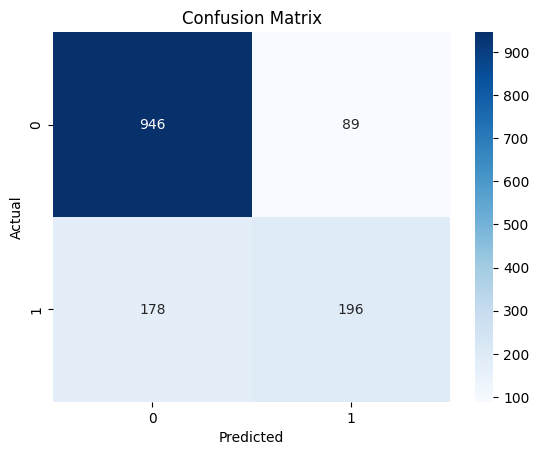

In [27]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
#Feature Importance
importances = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)


tenure                            0.098453
TotalCharges                      0.097267
MonthlyCharges                    0.082536
InternetService_Fiber optic       0.031534
Contract_Two year                 0.030896
PaymentMethod_Electronic check    0.027870
OnlineSecurity_Yes                0.022339
Contract_One year                 0.021111
TechSupport_Yes                   0.020940
PaperlessBilling_Yes              0.019843
dtype: float64

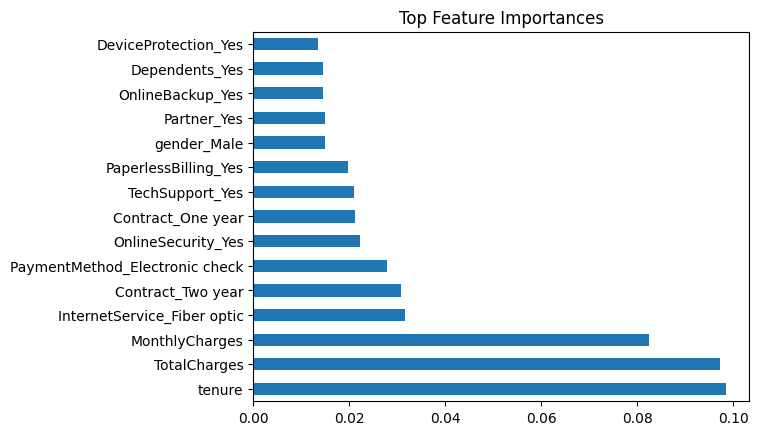

In [29]:
importances.head(15).plot(kind="barh")
plt.title("Top Feature Importances")
plt.show()


## Conclusion
- The Random Forest model performs well on churn prediction.
- Contract type, tenure, and monthly charges are key drivers of churn.
- This project demonstrates a full ML pipeline from raw data to evaluation.
